# Customer booking data

### Loading and inspecting
Import the necessary packages


In [7]:
# Importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Load the customer_booking data in a DataFrame named `bookings` and show the first 5 rows to inspect the DataFrame.

In [8]:
# Load the customer_booking data in a DataFrame named `bookings` and show the first 5 rows
bookings = pd.read_csv('customer_booking.csv')
print(bookings.head())

   Unnamed: 0  num_passengers sales_channel  trip_type  purchase_lead  \
0           0               2      Internet  RoundTrip            262   
1           1               1      Internet  RoundTrip            112   
2           2               2      Internet  RoundTrip            243   
3           3               1      Internet  RoundTrip             96   
4           4               2      Internet  RoundTrip             68   

   length_of_stay  flight_hour flight_day   route booking_origin  \
0              19            7        Sat  AKLDEL    New Zealand   
1              20            3        Sat  AKLDEL    New Zealand   
2              22           17        Wed  AKLDEL          India   
3              31            4        Sat  AKLDEL    New Zealand   
4              22           15        Wed  AKLDEL          India   

   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                    1                     0                      0   
1         

**Information about the dataframe**
  
  
This dataset contains information about airline bookings, including the number of passengers, sales channel, trip type, purchase lead time, length of stay, flight hour, flight day, route, booking origin, and various flags indicating if the customer wanted extra baggage, preferred seat, or in-flight meals. The dataset also includes the total flight duration and a flag indicating if the booking was completed. This information can be used for various analyses, such as predicting demand, identifying popular routes, and understanding customer preferences.

**Column Description**:
* num_passengers = number of passengers travelling
* sales_channel = sales channel booking was made on
* trip_type = trip Type (Round Trip, One Way, Circle Trip)
* purchase_lead = number of days between travel date and booking date
* length_of_stay = number of days spent at destination
* flight_hour = hour of flight departure
* flight_day = day of week of flight departure
* route = origin -> destination flight route
* booking_origin = country from where booking was made
* wants_extra_baggage = if the customer wanted extra baggage in the booking
* wants_preferred_seat = if the customer wanted a preferred seat in the booking
* wants_in_flight_meals = if the customer wanted in-flight meals in the booking
* flight_duration = total duration of flight (in hours)
* booking_complete = flag indicating if the customer completed the booking

### Completed bookings

Create a new dataframe named `completed_bookings`:
* only containing following columns:  
num_passengers, purchase_lead, length_of_stay, booking_origin, flight_duration and booking_complete
* with only the rows where the booking is completed (1)


In [10]:
# Create a new dataframe named `completed_bookings` with specified columns and completed bookings
completed_bookings = bookings[bookings['booking_complete'] == 1][[
    'num_passengers', 'purchase_lead', 'length_of_stay', 'booking_origin', 
    'flight_duration', 'booking_complete'
]]

#### Average purchase lead

Group the average days between booking date and traveling date per country of the booking. Display the countries with the lowest average of days between booking and traveling first and the ones with the most days last.

In [11]:
# Group by booking_origin and calculate average purchase_lead, sorted ascending
avg_purchase_lead = completed_bookings.groupby('booking_origin')['purchase_lead'].mean().sort_values()
print(avg_purchase_lead)

booking_origin
Czech Republic            3.000000
Vanuatu                  11.000000
Sweden                   12.600000
Bahrain                  16.000000
Greece                   16.000000
Kenya                    19.000000
Kuwait                   23.500000
Oman                     24.666667
United Arab Emirates     36.000000
Laos                     40.166667
Taiwan                   49.093750
Russia                   53.666667
Brunei                   53.951220
Spain                    55.000000
Pakistan                 55.000000
Cambodia                 55.250000
Seychelles               56.000000
Romania                  56.000000
Saudi Arabia             58.909091
Mexico                   59.000000
Macau                    59.147368
Vietnam                  59.315789
Australia                59.986667
(not set)                62.000000
Myanmar (Burma)          62.000000
United Kingdom           63.142857
Japan                    65.554393
Mauritius                66.750000
Franc

Display the average amount of days between booking date and flight date of Australia.

In [12]:
# Display average purchase lead for Australia
australia_avg = avg_purchase_lead['Australia']
print(f"Average purchase lead for Australia: {australia_avg:.2f} days")

Average purchase lead for Australia: 59.99 days


## Purchase lead histogram
Make a histogram (bar plot) of the purchase leads per country. Do this for the 5 countries with the most bookings. Place the purchase leads on the x-axis and the number of bookings on the y-axis. Use appropriate labels and show a legend.

**step 1** find the 5 countries with the most bookings and store them in a variable `countries`.

In [13]:
# Step 1: Find the 5 countries with the most bookings
countries = completed_bookings['booking_origin'].value_counts().head(5).index.tolist()
print("Top 5 countries:", countries)

Top 5 countries: ['Malaysia', 'Australia', 'China', 'Indonesia', 'Japan']


**step 2** Create a barplot for every country. Ensure you use appropriate labels and a legend.

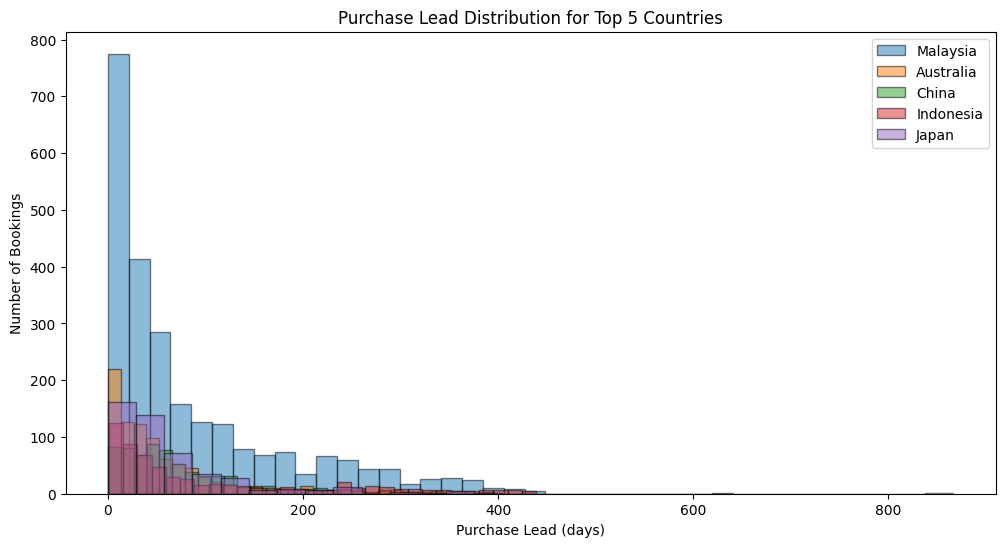

In [14]:
# Step 2: Create a bar plot for purchase leads per country
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = completed_bookings[completed_bookings['booking_origin'] == country]['purchase_lead']
    plt.hist(country_data, bins=30, alpha=0.5, label=country, edgecolor='black')
plt.xlabel('Purchase Lead (days)')
plt.ylabel('Number of Bookings')
plt.title('Purchase Lead Distribution for Top 5 Countries')
plt.legend()
plt.show()

The graph above is not really practical. First of all,  all the bins are very small so it is hard to read. Besides, bars with the same x-value are drawn on top of each other. This causes some bars to be invisible. Furthermore, we have a wide x-axis range with just a few data points above 500.
Let's try to make a cleaner graph.

## Try again
**Assignment**
Make a new histogram (bar plot) of the categorical purchase leads per country. Do this for the 5 countries with the most bookings. Place the purchase leads categories on the x-axis and the number of bookings on the y-axis. Use appropriate labels and show a legend.
### Categorizing purchase leads

Let's first categorize the purchase leads using following categories:
purchase lead
* more than 365 days before departure --> early bird
* 365 days or less in advance but more than 183 days in advance --> planner
* Booked more than 90 days prior to departure but at most 183 prior to departure --> seasonal booker
* Booked at most 90 days in advance --> late booker
* less than 2 weeks in advance --> last minute


In [15]:
# Categorizing purchase leads
def categorize_purchase_lead(days):
    if days > 365:
        return 'early bird'
    elif days > 183:
        return 'planner'
    elif days > 90:
        return 'seasonal booker'
    elif days > 14:
        return 'late booker'
    else:
        return 'last minute'

Add a new column "purchase_lead_category" in the completed_bookings dataframe containing the corresponding categories.

In [16]:
# Add purchase_lead_category column
completed_bookings['purchase_lead_category'] = completed_bookings['purchase_lead'].apply(categorize_purchase_lead)

Store the distinct categories in a variable named `pl_categories`, ordered from "last minute" to "early bird".

In [17]:
# Store distinct categories in order
pl_categories = ['last minute', 'late booker', 'seasonal booker', 'planner', 'early bird']

### Distinct dataframe top 5 
Create a new dataframe `top_df` containing the data of the top 5 countries with the most bookings.

Tip: use the variable `countries`which you already made.

In [18]:
# Create top_df with data from top 5 countries
top_df = completed_bookings[completed_bookings['booking_origin'].isin(countries)]

Display the total amount of purchase leads in every purchase_lead_category per country. Store this in a variable.

In [19]:
# Display total purchase leads per category per country
category_counts = top_df.groupby(['booking_origin', 'purchase_lead_category'])['purchase_lead'].count().unstack().fillna(0)
print(category_counts)

purchase_lead_category  early bird  last minute  late booker  planner  \
booking_origin                                                          
Australia                        4          230          491       61   
China                            3           90          395       66   
Indonesia                       28          116          268      118   
Japan                            4           99          282       31   
Malaysia                        46          538         1122      354   

purchase_lead_category  seasonal booker  
booking_origin                           
Australia                           114  
China                               140  
Indonesia                            85  
Japan                                62  
Malaysia                            408  


### Grouped bar plot
We want to display the data for every country using grouped bar charts. In order to evenly display the bars, we have to set the locations of our bars.



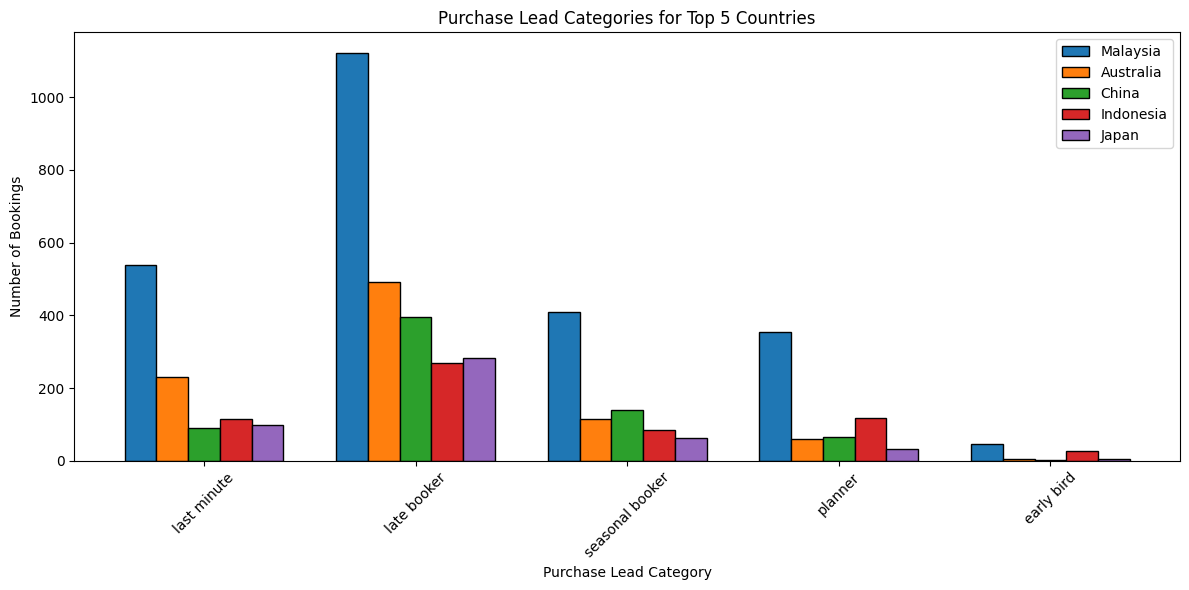

In [23]:
# Grouped bar plot
plt.figure(figsize=(12, 6))
bar_width = 0.15
r = np.arange(len(pl_categories))

for i, country in enumerate(countries):
    counts = [category_counts.loc[country, cat] if cat in category_counts.loc[country] else 0 for cat in pl_categories]
    plt.bar(r + i * bar_width, counts, width=bar_width, label=country, edgecolor='black')

plt.xlabel('Purchase Lead Category')
plt.ylabel('Number of Bookings')
plt.title('Purchase Lead Categories for Top 5 Countries')
plt.xticks(r + bar_width * 2, pl_categories, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Now it is time for you to draw the plot. Keep in mind
* Bars cannot overlap
* The order of countries is preserved (meaning the order of countries is the same for all categories)
* The order of the x value categories should be the same as the order stored in the list `pl_categories`
* Ensure the counts per country are plotted in the right category (the order on the x-axis might not be the same as the order in your dataset)
* Provide labels and a legend
* Rotate the x-axis labels to make them readable

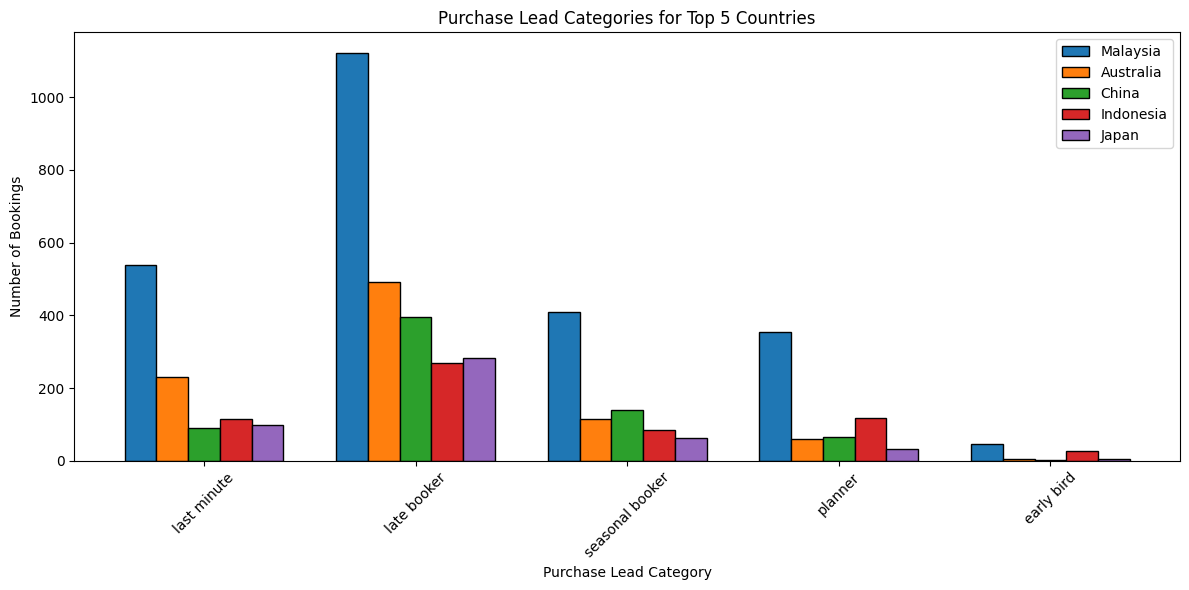

In [24]:
# Grouped bar plot
plt.figure(figsize=(12, 6))
bar_width = 0.15
r = np.arange(len(pl_categories))

for i, country in enumerate(countries):
    counts = [category_counts.loc[country, cat] if cat in category_counts.loc[country] else 0 for cat in pl_categories]
    plt.bar(r + i * bar_width, counts, width=bar_width, label=country, edgecolor='black')

plt.xlabel('Purchase Lead Category')
plt.ylabel('Number of Bookings')
plt.title('Purchase Lead Categories for Top 5 Countries')
plt.xticks(r + bar_width * 2, pl_categories, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

The image `PurchaseLeadCat_top5.png` displays the expected plot.

## Bookings

For the questions below, work with the `bookings` dataframe.

* Remove bookings with missing values
* Create a new column `duration_cat` indicating whether a flight is "Short", "Medium" or "Long" distance. Short distance flights take at most 3 hours, long distance flights take more than 6 hours.
* Create a new column `premium_customer`. A customer is a premium customer if they want extra baggage, preferred seating and in-flight meals. 


In [25]:
# Remove bookings with missing values
bookings = bookings.dropna()

In [26]:
# Create duration_cat column
def categorize_duration(duration):
    if duration <= 3:
        return 'Short'
    elif duration > 6:
        return 'Long'
    else:
        return 'Medium'

bookings['duration_cat'] = bookings['flight_duration'].apply(categorize_duration)

In [27]:
# Create premium_customer column
bookings['premium_customer'] = (
    (bookings['wants_extra_baggage'] == 1) & 
    (bookings['wants_preferred_seat'] == 1) & 
    (bookings['wants_in_flight_meals'] == 1)
).astype(int)

* Display summary statistics
* What percentage of bookings are completed vs incomplete?
* Which sales channel has the highest percentage of completion?
* What percentage of long distance travellers who completed their booking are premium customers? (You do not need to take into account the amount of travellers per booking.)
* What are the top 5 most popular routes based on the number of passengers?
* Display the average flight duration per country

In [28]:
# Summary statistics
print(bookings.describe())

         Unnamed: 0  num_passengers  purchase_lead  length_of_stay  \
count  50000.000000    50000.000000   50000.000000     50000.00000   
mean   24999.500000        1.591240      84.940480        23.04456   
std    14433.901067        1.020165      90.451378        33.88767   
min        0.000000        1.000000       0.000000         0.00000   
25%    12499.750000        1.000000      21.000000         5.00000   
50%    24999.500000        1.000000      51.000000        17.00000   
75%    37499.250000        2.000000     115.000000        28.00000   
max    49999.000000        9.000000     867.000000       778.00000   

       flight_hour  wants_extra_baggage  wants_preferred_seat  \
count  50000.00000         50000.000000          50000.000000   
mean       9.06634             0.668780              0.296960   
std        5.41266             0.470657              0.456923   
min        0.00000             0.000000              0.000000   
25%        5.00000             0.000000     

In [29]:
# Percentage completed vs incomplete
completion_rate = bookings['booking_complete'].value_counts(normalize=True) * 100
print(f"Completed bookings: {completion_rate[1]:.2f}%")
print(f"Incomplete bookings: {completion_rate[0]:.2f}%")

Completed bookings: 14.96%
Incomplete bookings: 85.04%


In [30]:
# Percentage of completion per sales channel
channel_completion = bookings.groupby('sales_channel')['booking_complete'].mean() * 100
print("Completion rate by sales channel:")
print(channel_completion)

Completion rate by sales channel:
sales_channel
Internet    15.476995
Mobile      10.840157
Name: booking_complete, dtype: float64


In [31]:
# Percentage of long distance travellers who completed booking and are premium customers
long_distance_completed = bookings[(bookings['duration_cat'] == 'Long') & (bookings['booking_complete'] == 1)]
premium_percentage = (long_distance_completed['premium_customer'].mean() * 100)
print(f"Percentage of long distance completed bookings that are premium: {premium_percentage:.2f}%")

Percentage of long distance completed bookings that are premium: 24.73%


In [32]:
# Top 5 routes based on number of passengers
top_routes = bookings.groupby('route')['num_passengers'].sum().sort_values(ascending=False).head(5)
print("Top 5 routes by passenger count:")
print(top_routes)

Top 5 routes by passenger count:
route
AKLKUL    4450
PENTPE    1566
DMKKIX    1428
ICNSIN    1335
MELSGN    1230
Name: num_passengers, dtype: int64


In [33]:
# Average flight duration per country
avg_duration = bookings.groupby('booking_origin')['flight_duration'].mean()
print("Average flight duration by country:")
print(avg_duration)

Average flight duration by country:
booking_origin
(not set)               6.649762
Afghanistan             4.750000
Algeria                 6.620000
Argentina               7.576667
Australia               7.968687
                          ...   
United Arab Emirates    7.699048
United Kingdom          7.450809
United States           6.883487
Vanuatu                 8.580000
Vietnam                 7.993789
Name: flight_duration, Length: 104, dtype: float64
